In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data=pd.read_csv('rel_train.csv')
data

,Date,Symbol,Open,High,Low,Close,Volume
0,2010-01-04,RELIANCE,1091.1,1091.10,1021.85,1075.50,17520006
1,2010-01-05,RELIANCE,1149.9,1149.90,1065.40,1070.70,4890040
2,2010-01-06,RELIANCE,1079.9,1094.50,1070.65,1088.00,5415538
3,2010-01-07,RELIANCE,1088.0,1115.00,1078.00,1106.05,5988404
4,2010-01-08,RELIANCE,1108.0,1113.80,1096.00,1103.15,3453926
...,...,...,...,...,...,...,...
1490,2015-12-24,RELIANCE,1003.9,1007.20,996.30,1000.55,2720569
1491,2015-12-28,RELIANCE,1000.6,1013.75,1000.00,1010.40,2945508
1492,2015-12-29,RELIANCE,1010.4,1018.70,1007.15,1015.40,3409060
1493,2015-12-30,RELIANCE,1015.0,1016.00,1002.00,1004.50,1863321


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1495 non-null   object 
 1   Symbol  1495 non-null   object 
 2   Open    1495 non-null   float64
 3   High    1495 non-null   float64
 4   Low     1495 non-null   float64
 5   Close   1495 non-null   float64
 6   Volume  1495 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 81.9+ KB


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1495 non-null   object 
 1   Symbol  1495 non-null   object 
 2   Open    1495 non-null   float64
 3   High    1495 non-null   float64
 4   Low     1495 non-null   float64
 5   Close   1495 non-null   float64
 6   Volume  1495 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 81.9+ KB


In [6]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(1495, 1)

In [7]:
X_train=[]
y_train=[]

for i in range(60,1149):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
    
X_train,y_train=np.array(X_train),np.array(y_train)
    

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")


In [10]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 18s - loss: 0.0354 - 18s/epoch - 516ms/step
Epoch 2/20
35/35 - 9s - loss: 0.0113 - 9s/epoch - 266ms/step
Epoch 3/20
35/35 - 9s - loss: 0.0099 - 9s/epoch - 243ms/step
Epoch 4/20
35/35 - 8s - loss: 0.0088 - 8s/epoch - 240ms/step
Epoch 5/20
35/35 - 8s - loss: 0.0078 - 8s/epoch - 220ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0162 - 7s/epoch - 213ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0079 - 7s/epoch - 202ms/step
Epoch 8/20
35/35 - 8s - loss: 0.0069 - 8s/epoch - 214ms/step
Epoch 9/20
35/35 - 8s - loss: 0.0060 - 8s/epoch - 226ms/step
Epoch 10/20
35/35 - 8s - loss: 0.0060 - 8s/epoch - 226ms/step
Epoch 11/20
35/35 - 8s - loss: 0.0069 - 8s/epoch - 234ms/step
Epoch 12/20
35/35 - 8s - loss: 0.0089 - 8s/epoch - 221ms/step
Epoch 13/20
35/35 - 8s - loss: 0.0055 - 8s/epoch - 220ms/step
Epoch 14/20
35/35 - 8s - loss: 0.0053 - 8s/epoch - 222ms/step
Epoch 15/20
35/35 - 8s - loss: 0.0053 - 8s/epoch - 230ms/step
Epoch 16/20
35/35 - 8s - loss: 0.0058 - 8s/epoch - 225ms/step
Epoch 17/20
35/

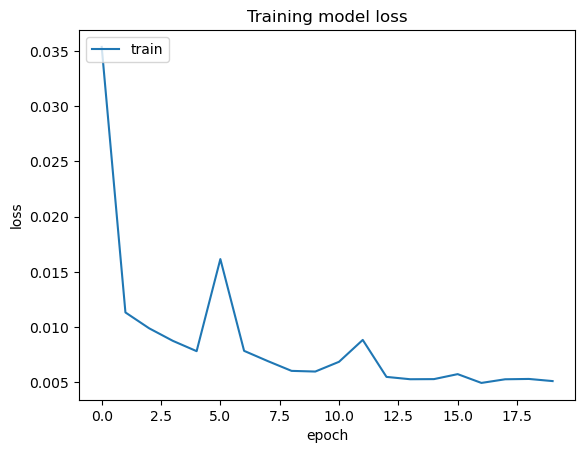

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [12]:
testData = pd.read_csv('rel_test.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData=testData.iloc[:,4:5]
y_test=testData.iloc[60:,0:].values

inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length=len(testData)
timestep=60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test=np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1174, 60, 1)

In [13]:
print(X_test)

[[[0.46794801]
  [0.46939229]
  [0.44672814]
  ...
  [0.37318076]
  [0.33562937]
  [0.28530163]]

 [[0.46939229]
  [0.44672814]
  [0.35318298]
  ...
  [0.33562937]
  [0.28530163]
  [0.27419176]]

 [[0.44672814]
  [0.35318298]
  [0.36429286]
  ...
  [0.28530163]
  [0.27419176]
  [0.32207532]]

 ...

 [[1.35751583]
  [1.4053994 ]
  [1.3781802 ]
  ...
  [1.96589268]
  [1.93189646]
  [1.86001555]]

 [[1.4053994 ]
  [1.3781802 ]
  [1.3515165 ]
  ...
  [1.93189646]
  [1.86001555]
  [1.88479058]]

 [[1.3781802 ]
  [1.3515165 ]
  [1.40162204]
  ...
  [1.86001555]
  [1.88479058]
  [1.89978891]]]


In [14]:
y_pred=model.predict(X_test)
y_pred

37/37 [==============================] - 5s 70ms/step


array([[0.377604  ],
       [0.36465845],
       [0.34965837],
       ...,
       [1.729396  ],
       [1.7053417 ],
       [1.6812252 ]], dtype=float32)

In [15]:
predicted_price=sc.inverse_transform(y_pred)

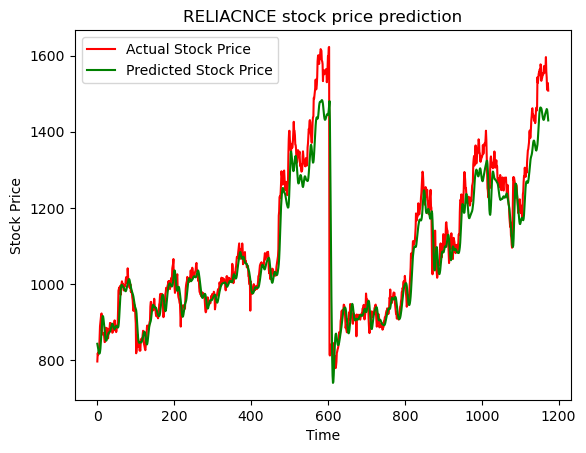

In [16]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('RELIACNCE stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [17]:
sum(y_pred)/len(y_pred)

array([0.8931758], dtype=float32)

In [18]:
cutoff=1
y_pred_classes = np.zeros_like(y_pred)
y_pred_classes[y_pred>cutoff]=1

In [19]:
sum(y_test)/len(y_test)

array([1097.11166951])

In [20]:
cutoff=1097
y_test_classes = np.zeros_like(y_test)
y_test_classes[y_test > cutoff] = 1

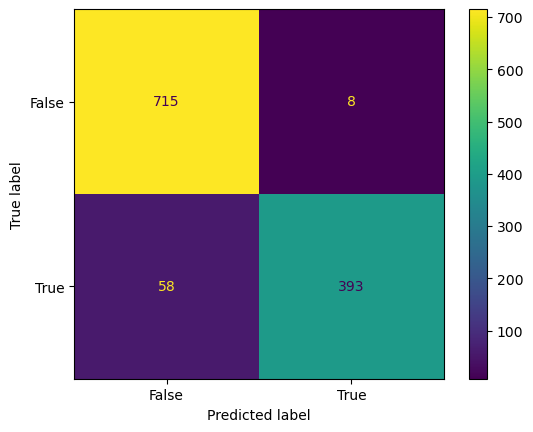

In [21]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_classes,y_pred_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [22]:
len(y_pred)

1174